# Introduction
In this project, I will assist my client in enhancing customer satisfaction to drive profitability in the property rental business.

# Identification Problem

## Case Study
I am a Data Analyst working on a project for a client to help improve their property rental business through the Airbnb platform. The main focus of this project is to analyze and identify facilities or other factors crucial for enhancing customer satisfaction, ultimately aiming to have a positive impact on the generated revenue.

## SMART Framework
1. Specific: Enhance customer satisfaction by providing facilities that align with customer needs and preferences.
2. Measurable: Achieve a review score of 90%.
3. Achievable: Improve facilities, policies, and other components.
4. Relevant: The appropriate improvement will minimize the budget impact while boosting customer satisfaction.
5. Time-Bound: Attainable within the next quarter.

## Problem Statement

Enhancing customer satisfaction by improving facilities and other factors to boost customer reviews in the next quarter, taking into account the needs and preferences of customers.

## Break Down the Problem
#### Visualisasi
- What facilities are available in the rental places?
- What is the average accommodation count based on property type and room type?
- How many accommodation rental listings are there in each city?
- How does the rental price compare across different property types and room types?
#### Statistik
- How is the analysis of customer review data?
- Does the response time of the renting host correlate with customer satisfaction?
- Which facilities significantly impact customer satisfaction?
- Is there a relationship between rental cancellation policies and customer satisfaction?

source of data: https://public.opendatasoft.com/explore/dataset/airbnb-listings/table/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features<br>
source of tableau : https://public.tableau.com/app/profile/destriana.ramadani/viz/AirbnbCustomerSatisfactionAnalysis/Dashboard2?publish=yes

# Data Loading

In [499]:
# Import all required modules

from sklearn.preprocessing import MultiLabelBinarizer
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns

%matplotlib inline
warnings.filterwarnings("ignore")

In [500]:
# Load the data
df = pd.read_csv('airbnb-dataset.csv', delimiter=';')
df

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,7349477,https://www.airbnb.com/rooms/7349477,20170403112125,2017-04-03,No Hassle Stay With Friendly People,"Clean and comfortable room with, super fast wi...",You have your own built in robe. A bit about ...,"Clean and comfortable room with, super fast wi...",none,"Check out ""The Blend"" cafe for the best coffee...",...,9.0,8.0,9.0,NaN,NaN,moderate,2,1.22,"-33.797289712024345, 150.93770243283745","Host Has Profile Pic,Host Identity Verified"
1,10104762,https://www.airbnb.com/rooms/10104762,20170403112125,2017-04-03,Fully furniture room,One room with double bed and closet in a fully...,NaN,One room with double bed and closet in a fully...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,0.07,"-33.8843430868835, 151.12357777315654","Host Has Profile Pic,Is Location Exact"
2,4245073,https://www.airbnb.com/rooms/4245073,20170403112125,2017-04-03,HABERFIELD Loudon Avenue L'Abode,"An ideal summer playground, this charming 3-be...","The Location: Known as the ‘Garden Suburb’, Ha...","An ideal summer playground, this charming 3-be...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,156,NaN,"-33.872944572788235, 151.13887851225263","Host Has Profile Pic,Host Identity Verified,Is..."
3,7891346,https://www.airbnb.com/rooms/7891346,20170403112125,2017-04-03,Large sunny room,"Enjoy banter and baked goods in Summer Hill, S...",NaN,"Enjoy banter and baked goods in Summer Hill, S...",none,NaN,...,10.0,8.0,10.0,NaN,NaN,flexible,1,0.10,"-33.89020054362753, 151.13535597286582","Host Has Profile Pic,Is Location Exact"
4,7155389,https://www.airbnb.com/rooms/7155389,20170403112125,2017-04-03,Inner West Oasis,Enjoy the sounds of birds and rustling trees i...,A newly renovated free standing studio apartme...,Enjoy the sounds of birds and rustling trees i...,none,We are situated in a little oasis of calm in t...,...,10.0,9.0,10.0,NaN,NaN,strict,2,1.25,"-33.88022051183666, 151.1255080834316","Host Is Superhost,Host Has Profile Pic,Host Id..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40688,7351253,https://www.airbnb.com/rooms/7351253,20160401210219,2016-04-02,Sanbah Absolute Beachfront,The apartment sits on the cusp of the beach in...,NaN,The apartment sits on the cusp of the beach in...,none,NaN,...,10.0,10.0,9.0,NaN,NaN,strict,2,0.69,"-28.795379005371746, 153.59392778898442","Host Has Profile Pic,Is Location Exact"
40689,3940896,https://www.airbnb.com/rooms/3940896,20160401210219,2016-04-02,Stunning Shelly Beach Views,Great beach getaway! From this stylish beach i...,Great views and location.,Great beach getaway! From this stylish beach i...,none,"100m to Shelly Beach, 3 min walk to Belle Gene...",...,9.0,9.0,9.0,NaN,NaN,moderate,1,1.50,"-28.864792319346417, 153.5913355991323",Host Has Profile Pic
40690,10295915,https://www.airbnb.com/rooms/10295915,20160401210219,2016-04-02,The (bright) Blue House: Lismore,"Warm welcome to my character-filled, comfortab...",You have a private front entrance that include...,"Warm welcome to my character-filled, comfortab...",none,Lismore is far more lively than many realise. ...,...,10.0,9.0,9.0,NaN,NaN,flexible,1,2.34,"-28.804390002417236, 153.29110552550063","Host Has Profile Pic,Host Identity Verified"
40691,9054337,https://www.airbnb.com/rooms/9054337,20160401210219,2016-04-02,Spring Street B and B,"A quiet air conditioned room with ensuite, wal...",This room has its own entrance in a lovely pri...,"A quiet air conditioned room with ensuite, wal...",none,Lismore is in the heart of the Northern Rivers...,...,10.0,10.0,10.0,NaN,NaN,moderate,1,3.41,"-28.817050600590733, 153.28994380862994","Host Has Profile Pic,Is Location Exact"


In [633]:
# Show all columns label name
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [634]:
# Select the required columns and put them in a new variable
data = df[['ID', 'Host ID','Name','Street', 'City', 'Latitude', 'Longitude', 'Host Response Rate', 'Property Type', 'Room Type', 'Accommodates','Bathrooms', 'Bedrooms', 'Beds',
        'Amenities', 'Price','Review Scores Rating', 'Cancellation Policy']]

# Drop rows with null values
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

data

,ID,Host ID,Name,Street,City,Latitude,Longitude,Host Response Rate,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Price,Review Scores Rating,Cancellation Policy
0,7349477,8580701,No Hassle Stay With Friendly People,"Toongabbie, NSW 2146, Australia",Toongabbie,-33.797290,150.937702,100.0,House,Private room,1,1.0,1.0,1.0,"TV,Internet,Wireless Internet,Air conditioning...",41.0,89.0,moderate
1,7155389,7186509,Inner West Oasis,"Ashfield, NSW 2131, Australia",Ashfield,-33.880221,151.125508,100.0,Apartment,Entire home/apt,4,1.0,1.0,2.0,"TV,Internet,Wireless Internet,Air conditioning...",89.0,95.0,strict
2,16430428,96112658,Cozy room for your stay in Sydney,"Ashfield, NSW 2131, Australia",Ashfield,-33.878257,151.124993,100.0,Apartment,Private room,1,1.0,2.0,1.0,"TV,Internet,Wireless Internet,Kitchen,Free par...",55.0,100.0,flexible
3,12326780,4945022,Newly available bedroom in modern house,"Newtown/Enmore, Enmore, NSW 2042, Australia",Enmore,-33.895021,151.172957,100.0,House,Private room,2,2.0,1.0,1.0,"TV,Internet,Wireless Internet,Air conditioning...",91.0,100.0,flexible
4,2548791,13050956,Large 1BR apt near Sydney Uni/UTS,"Marrickville, Marrickville, NSW 2204, Australia",Marrickville,-33.905659,151.170157,100.0,Apartment,Entire home/apt,2,1.0,1.0,1.0,"TV,Internet,Wireless Internet,Air conditioning...",95.0,100.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23805,2540622,11980543,Beautiful Ballina by the Sea #1,"Summerhill Crescent, Cumbalum, New South Wales...",Cumbalum,-28.830637,153.538011,100.0,House,Private room,6,3.0,1.0,6.0,"TV,Internet,Wireless Internet,Air Conditioning...",40.0,96.0,flexible
23806,7351253,38519780,Sanbah Absolute Beachfront,"Rayner Lane, Lennox Head, NSW 2478, Australia",Lennox Head,-28.795379,153.593928,100.0,Apartment,Entire home/apt,4,2.0,3.0,4.0,"TV,Cable TV,Internet,Wireless Internet,Air Con...",286.0,100.0,strict
23807,3940896,20420993,Stunning Shelly Beach Views,"Suvla St, East Ballina, New South Wales 2478, ...",East Ballina,-28.864792,153.591336,75.0,Apartment,Entire home/apt,4,1.0,2.0,3.0,"TV,Kitchen,Free Parking on Premises,Hot Tub,He...",150.0,89.0,moderate
23808,10295915,52970183,The (bright) Blue House: Lismore,"Lismore, NSW 2480, Australia",Lismore,-28.804390,153.291106,90.0,House,Private room,2,1.0,1.0,1.0,"TV,Internet,Wireless Internet,Wheelchair Acces...",67.0,96.0,flexible


In [635]:
# Checks columns, non-null value, and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23810 entries, 0 to 23809
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    23810 non-null  int64  
 1   Host ID               23810 non-null  int64  
 2   Name                  23810 non-null  object 
 3   Street                23810 non-null  object 
 4   City                  23810 non-null  object 
 5   Latitude              23810 non-null  float64
 6   Longitude             23810 non-null  float64
 7   Host Response Rate    23810 non-null  float64
 8   Property Type         23810 non-null  object 
 9   Room Type             23810 non-null  object 
 10  Accommodates          23810 non-null  int64  
 11  Bathrooms             23810 non-null  float64
 12  Bedrooms              23810 non-null  float64
 13  Beds                  23810 non-null  float64
 14  Amenities             23810 non-null  object 
 15  Price              

# Data Cleaning

In [636]:
# Cleaning the data by replace symbol and change case
data['Amenities'] = data['Amenities'].str.replace('-', ' ')
data['Amenities'] = data['Amenities'].str.title()
data

,ID,Host ID,Name,Street,City,Latitude,Longitude,Host Response Rate,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Price,Review Scores Rating,Cancellation Policy
0,7349477,8580701,No Hassle Stay With Friendly People,"Toongabbie, NSW 2146, Australia",Toongabbie,-33.797290,150.937702,100.0,House,Private room,1,1.0,1.0,1.0,"Tv,Internet,Wireless Internet,Air Conditioning...",41.0,89.0,moderate
1,7155389,7186509,Inner West Oasis,"Ashfield, NSW 2131, Australia",Ashfield,-33.880221,151.125508,100.0,Apartment,Entire home/apt,4,1.0,1.0,2.0,"Tv,Internet,Wireless Internet,Air Conditioning...",89.0,95.0,strict
2,16430428,96112658,Cozy room for your stay in Sydney,"Ashfield, NSW 2131, Australia",Ashfield,-33.878257,151.124993,100.0,Apartment,Private room,1,1.0,2.0,1.0,"Tv,Internet,Wireless Internet,Kitchen,Free Par...",55.0,100.0,flexible
3,12326780,4945022,Newly available bedroom in modern house,"Newtown/Enmore, Enmore, NSW 2042, Australia",Enmore,-33.895021,151.172957,100.0,House,Private room,2,2.0,1.0,1.0,"Tv,Internet,Wireless Internet,Air Conditioning...",91.0,100.0,flexible
4,2548791,13050956,Large 1BR apt near Sydney Uni/UTS,"Marrickville, Marrickville, NSW 2204, Australia",Marrickville,-33.905659,151.170157,100.0,Apartment,Entire home/apt,2,1.0,1.0,1.0,"Tv,Internet,Wireless Internet,Air Conditioning...",95.0,100.0,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23805,2540622,11980543,Beautiful Ballina by the Sea #1,"Summerhill Crescent, Cumbalum, New South Wales...",Cumbalum,-28.830637,153.538011,100.0,House,Private room,6,3.0,1.0,6.0,"Tv,Internet,Wireless Internet,Air Conditioning...",40.0,96.0,flexible
23806,7351253,38519780,Sanbah Absolute Beachfront,"Rayner Lane, Lennox Head, NSW 2478, Australia",Lennox Head,-28.795379,153.593928,100.0,Apartment,Entire home/apt,4,2.0,3.0,4.0,"Tv,Cable Tv,Internet,Wireless Internet,Air Con...",286.0,100.0,strict
23807,3940896,20420993,Stunning Shelly Beach Views,"Suvla St, East Ballina, New South Wales 2478, ...",East Ballina,-28.864792,153.591336,75.0,Apartment,Entire home/apt,4,1.0,2.0,3.0,"Tv,Kitchen,Free Parking On Premises,Hot Tub,He...",150.0,89.0,moderate
23808,10295915,52970183,The (bright) Blue House: Lismore,"Lismore, NSW 2480, Australia",Lismore,-28.804390,153.291106,90.0,House,Private room,2,1.0,1.0,1.0,"Tv,Internet,Wireless Internet,Wheelchair Acces...",67.0,96.0,flexible


In [637]:
# Split data and change to list from aminities columns by comma
data['Amenities'] = data['Amenities'].str.split(',')

data['Amenities']

0        [Tv, Internet, Wireless Internet, Air Conditio...
1        [Tv, Internet, Wireless Internet, Air Conditio...
2        [Tv, Internet, Wireless Internet, Kitchen, Fre...
3        [Tv, Internet, Wireless Internet, Air Conditio...
4        [Tv, Internet, Wireless Internet, Air Conditio...
                               ...                        
23805    [Tv, Internet, Wireless Internet, Air Conditio...
23806    [Tv, Cable Tv, Internet, Wireless Internet, Ai...
23807    [Tv, Kitchen, Free Parking On Premises, Hot Tu...
23808    [Tv, Internet, Wireless Internet, Wheelchair A...
23809    [Tv, Wireless Internet, Air Conditioning, Free...
Name: Amenities, Length: 23810, dtype: object

In [638]:
# Initialize MultiLabelBinarizer with sparse_output set to True
mlb = MultiLabelBinarizer(sparse_output=True)

# Transform 'Amenities' column into binary labels and join the resulting DataFrame with the original one
data = data.join(pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(data.pop('Amenities')),
                index=data.index,
                columns=mlb.classes_))
# Display the column names after the transformation
data.columns

Index(['ID', 'Host ID', 'Name', 'Street', 'City', 'Latitude', 'Longitude',
       'Host Response Rate', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating',
       'Cancellation Policy', '24 Hour Check In', 'Air Conditioning',
       'Baby Bath', 'Baby Monitor', 'Babysitter Recommendations', 'Bathtub',
       'Breakfast', 'Buzzer/Wireless Intercom', 'Cable Tv',
       'Carbon Monoxide Detector', 'Cat(S)', 'Changing Table',
       'Children’S Books And Toys', 'Children’S Dinnerware', 'Crib', 'Dog(S)',
       'Doorman', 'Doorman Entry', 'Dryer', 'Elevator In Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'Fireplace Guards', 'First Aid Kit', 'Free Parking On Premises',
       'Free Parking On Street', 'Game Console', 'Gym', 'Hair Dryer',
       'Hangers', 'Heating', 'High Chair', 'Hot Tub', 'Indoor Fireplace',
       'Internet', 'Iron', 'Keypad', 'Kitchen', 'Laptop Friendly Workspace',
  

In [639]:
# Delete unwanted columns
data = data.drop(['Translation Missing: En.Hosting_Amenity_49',
       'Translation Missing: En.Hosting_Amenity_50'], axis=1)
data

,ID,Host ID,Name,Street,City,Latitude,Longitude,Host Response Rate,Property Type,Room Type,...,Smoking Allowed,Stair Gates,Suitable For Events,Table Corner Guards,Tv,Washer,Washer / Dryer,Wheelchair Accessible,Window Guards,Wireless Internet
0,7349477,8580701,No Hassle Stay With Friendly People,"Toongabbie, NSW 2146, Australia",Toongabbie,-33.797290,150.937702,100.0,House,Private room,...,0,0,0,0,1,1,0,0,0,1
1,7155389,7186509,Inner West Oasis,"Ashfield, NSW 2131, Australia",Ashfield,-33.880221,151.125508,100.0,Apartment,Entire home/apt,...,0,0,0,0,1,1,0,0,0,1
2,16430428,96112658,Cozy room for your stay in Sydney,"Ashfield, NSW 2131, Australia",Ashfield,-33.878257,151.124993,100.0,Apartment,Private room,...,0,0,0,0,1,1,0,0,0,1
3,12326780,4945022,Newly available bedroom in modern house,"Newtown/Enmore, Enmore, NSW 2042, Australia",Enmore,-33.895021,151.172957,100.0,House,Private room,...,0,0,0,0,1,1,0,0,0,1
4,2548791,13050956,Large 1BR apt near Sydney Uni/UTS,"Marrickville, Marrickville, NSW 2204, Australia",Marrickville,-33.905659,151.170157,100.0,Apartment,Entire home/apt,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23805,2540622,11980543,Beautiful Ballina by the Sea #1,"Summerhill Crescent, Cumbalum, New South Wales...",Cumbalum,-28.830637,153.538011,100.0,House,Private room,...,1,0,0,0,1,1,0,1,0,1
23806,7351253,38519780,Sanbah Absolute Beachfront,"Rayner Lane, Lennox Head, NSW 2478, Australia",Lennox Head,-28.795379,153.593928,100.0,Apartment,Entire home/apt,...,0,0,0,0,1,1,0,0,0,1
23807,3940896,20420993,Stunning Shelly Beach Views,"Suvla St, East Ballina, New South Wales 2478, ...",East Ballina,-28.864792,153.591336,75.0,Apartment,Entire home/apt,...,0,0,0,0,1,1,0,0,0,0
23808,10295915,52970183,The (bright) Blue House: Lismore,"Lismore, NSW 2480, Australia",Lismore,-28.804390,153.291106,90.0,House,Private room,...,0,0,0,0,1,0,0,1,0,1


## Visualisasi Data

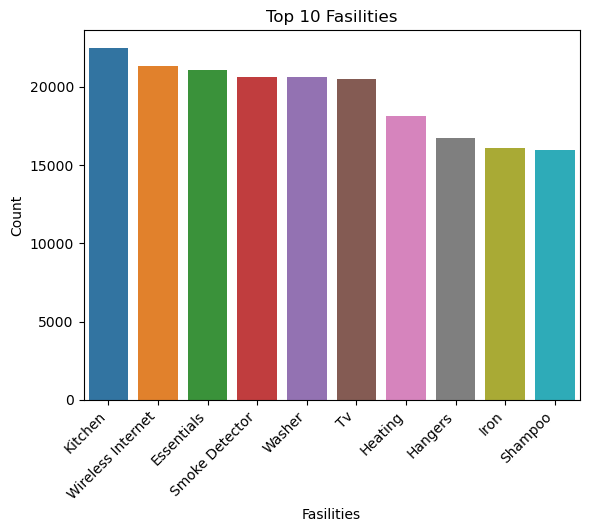

In [640]:
col_fasility = data.columns[17:]
column_sums = data[col_fasility].sum().sort_values(ascending=False).head(10)

sns.barplot(x=column_sums.index, y=column_sums.values)

plt.xticks(rotation=45, ha='right')

plt.title("Top 10 Fasilities")
plt.xlabel("Fasilities")
plt.ylabel("Count")

plt.show()

From the plotted results above, we can observe the top 10 most common amenities in rental accommodations. Based on this, we can conclude that these 10 items could be considered essential facilities for those running a rental business.

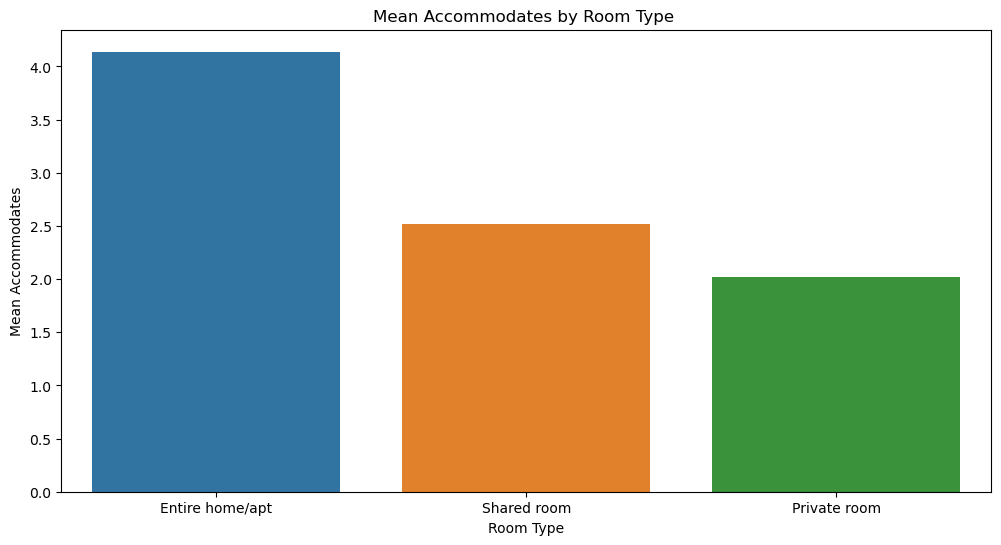

In [641]:
mean_accommodates = data.groupby('Room Type')['Accommodates'].mean().reset_index().sort_values(by = 'Accommodates',ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Room Type', y='Accommodates', data=mean_accommodates)

# Set plot title and axis labels
plt.title('Mean Accommodates by Room Type ')
plt.xlabel('Room Type')
plt.ylabel('Mean Accommodates')

# Show the plot
plt.show()

The plot above displays the average number of accommodations provided in rental listings by room type. This information can offer insights, such as recommendations for the required number of rooms when renting a property.

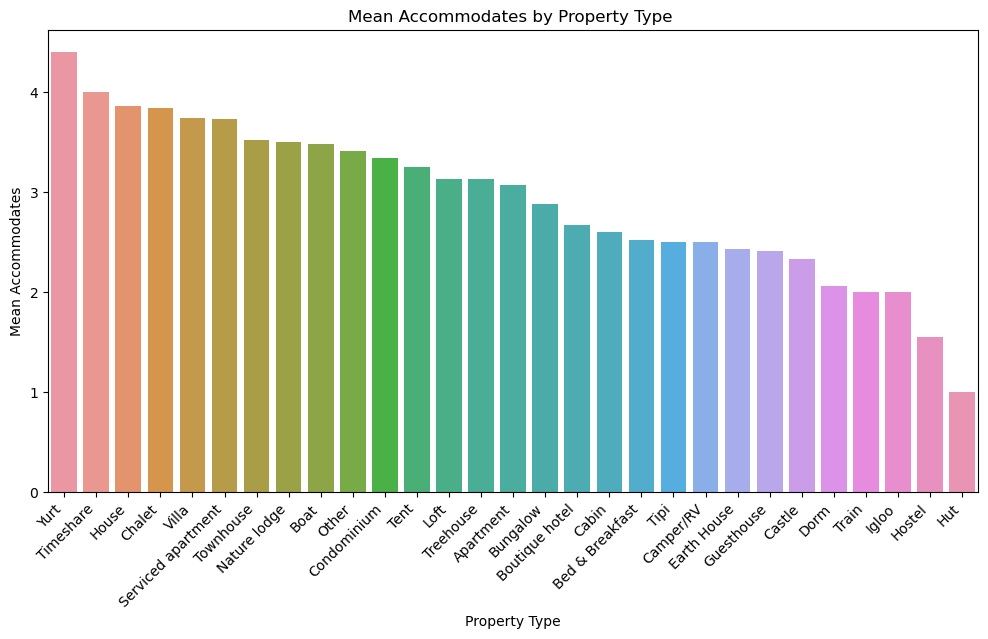

In [642]:
mean_accommodates = data.groupby('Property Type')['Accommodates'].mean().reset_index().sort_values(by = 'Accommodates',ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Property Type', y='Accommodates', data=mean_accommodates)

plt.xticks(rotation=45, ha='right')

# Set plot title and axis labels
plt.title('Mean Accommodates by Property Type ')
plt.xlabel('Property Type')
plt.ylabel('Mean Accommodates')

# Show the plot
plt.show()

The plot above displays the average number of accommodations provided in rental listings by property type. This information can offer insights, such as recommendations for the required number of rooms when renting a property.

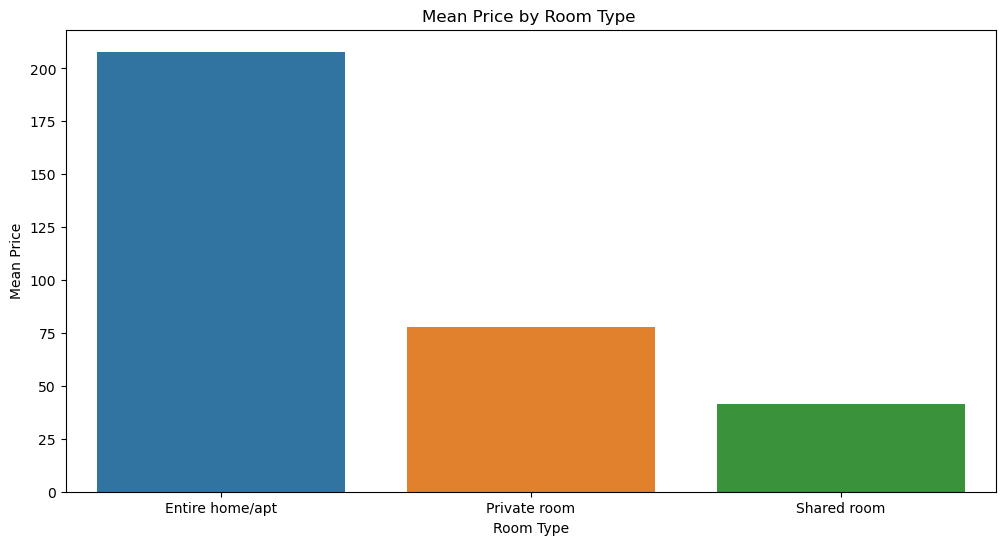

In [643]:
price_room = data.groupby('Room Type')['Price'].mean().reset_index().sort_values(by = 'Price',ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Room Type', y='Price', data=price_room)

# Set plot title and axis labels
plt.title('Mean Price by Room Type ')
plt.xlabel('Room Type')
plt.ylabel('Mean Price')

# Show the plot
plt.show()

The plot above illustrates the average rental prices for different room types. This can serve as a consideration for determining rental prices for each room type.

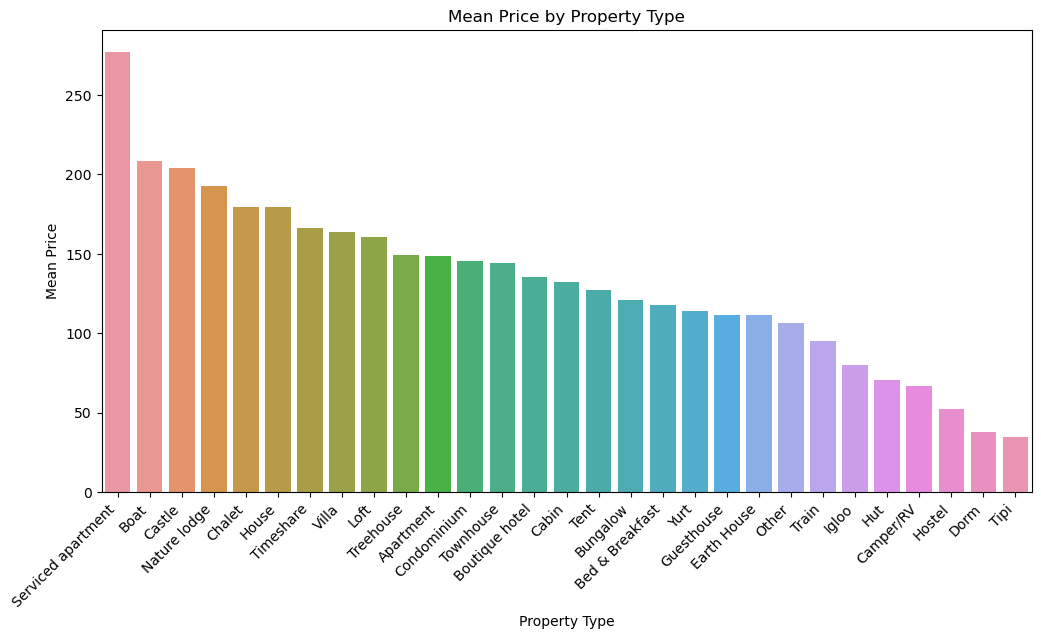

In [644]:
price_property = data.groupby('Property Type')['Price'].mean().reset_index().sort_values(by = 'Price',ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Property Type', y='Price', data=price_property)

plt.xticks(rotation=45, ha='right')

# Set plot title and axis labels
plt.title('Mean Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Mean Price')

# Show the plot
plt.show()

The plot above illustrates the average rental prices for different property types. This can serve as a consideration for determining rental prices for each property type.

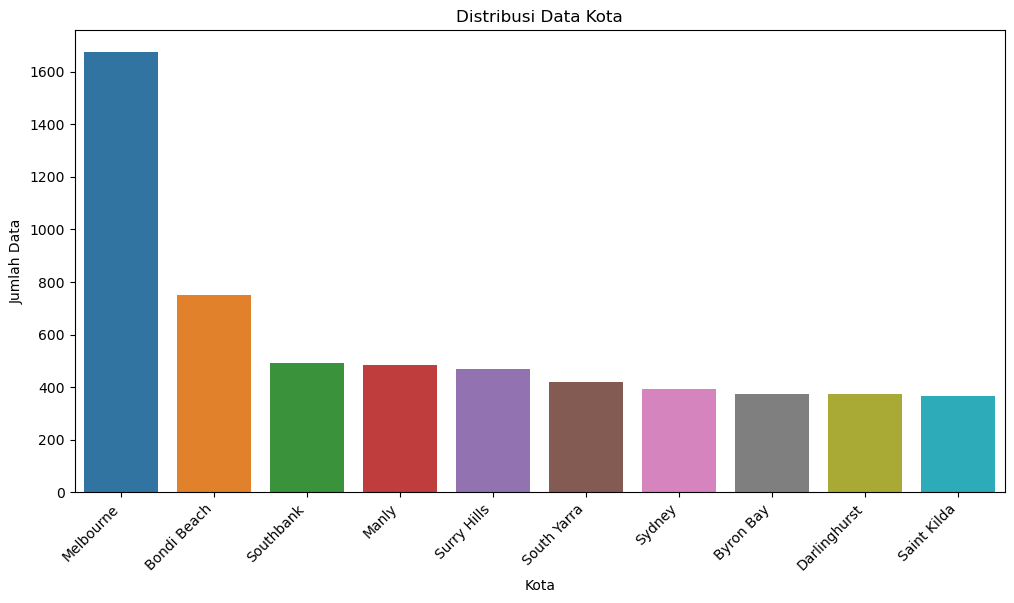

In [645]:
city_counts = data['City'].value_counts().head(10)

# Membuat bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)

# Menyesuaikan penanda sumbu x untuk membaca lebih baik
plt.xticks(rotation=45, ha='right')

# Menetapkan judul dan label sumbu
plt.title('Distribusi Data Kota')
plt.xlabel('Kota')
plt.ylabel('Jumlah Data')

# Menampilkan plot
plt.show()

The plot above illustrates the number of properties available for rent in each city. This information can be a consideration for renting accommodation, whether in a city with a high concentration of rental properties or vice versa.

# Analisis dan Perhitungan

## Statistik Deskriptif

### Measurement of Central Tendency

In [646]:
mean_score_rating = data['Review Scores Rating'].mean()
median_score_rating = data['Review Scores Rating'].mean()
mode_score_rating = data['Review Scores Rating'].mode().values[0]

print(f'Average of Review Score Rating : {mean_score_rating}')
print(f'Median of Review Score Rating: {median_score_rating}')
print(f'Mode of Review Score Rating: {mode_score_rating}')

Average of Review Score Rating : 93.65380092398152
Median of Review Score Rating: 93.65380092398152
Mode of Review Score Rating: 100.0


### Measurement of Dispersion

In [647]:
min_score = data['Review Scores Rating'].min()
max_score = data['Review Scores Rating'].max()
range = max_score - min_score

print(f'Maximum Score Review: {max_score}')
print(f'Minimum Score Review: {min_score}')
print(f'Range Score Review: {range}')

Maximum Score Review: 100.0
Minimum Score Review: 20.0
Range Score Review: 80.0


### Quartile

In [648]:
q1 = data['Review Scores Rating'].quantile(0.25)
q2 = data['Review Scores Rating'].quantile(0.5)
q3 = data['Review Scores Rating'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

Q1: 91.0
Q2: 96.0
Q3: 100.0
Interquartile Range (IQR): 9.0


<Axes: >

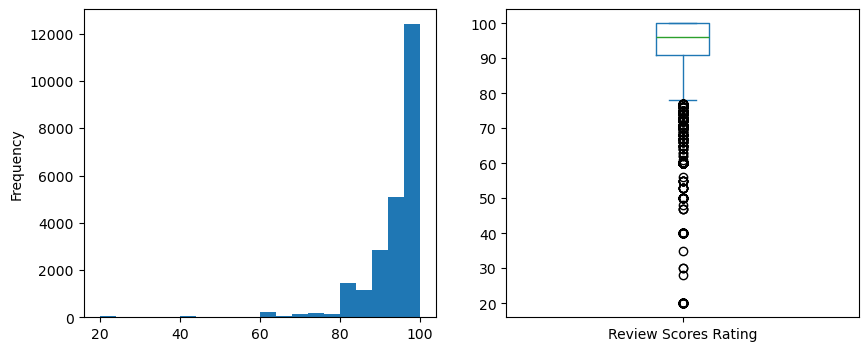

In [649]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data['Review Scores Rating'].plot(kind='hist',bins=20, ax=ax[0])
data['Review Scores Rating'].plot(kind='box',ax=ax[1])

The plot above indicates that the data is right-skewed, with a concentration toward the right. Additionally, a significant number of outliers are evident. This suggests that the data distribution is not normal.

In [650]:
print(f"Skewness: {data['Review Scores Rating'].skew()}")

Skewness: -3.098749630567183


Since the skewness value is less than 0.5, the z-score method is utilized for handling outliers.

In [651]:
std = data['Review Scores Rating'].std()

up_bound = mean_score_rating + 3*std
low_bound = mean_score_rating - 3*std

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 118.19
Lower Boundary: 69.12


In [652]:
data = data[(data['Review Scores Rating']>=low_bound) & (data['Review Scores Rating'])]

<Axes: >

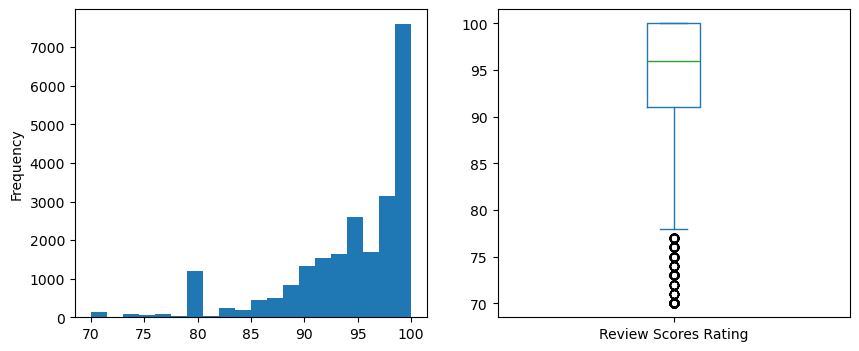

In [653]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data['Review Scores Rating'].plot(kind='hist',bins=20,ax=ax[0])
data['Review Scores Rating'].plot(kind='box',ax=ax[1])

It is evident that the data distribution is still right-skewed, indicating a non-normal distribution. However, the presence of outliers has been reduced.

### Corelation Analysis

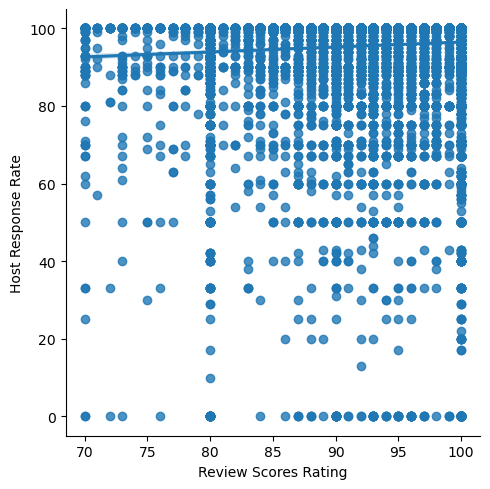

In [654]:
sns.lmplot(data=data,x='Review Scores Rating', y='Host Response Rate')

The scatter plot indicates a somewhat unclear distribution of correlation data, but the line suggests a positive correlation that is not statistically significant.

<Axes: >

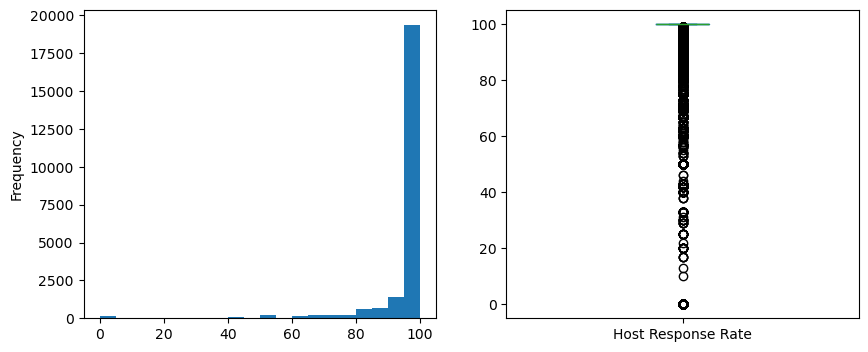

In [655]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data['Host Response Rate'].plot(kind='hist',bins=20,ax=ax[0])
data['Host Response Rate'].plot(kind='box',ax=ax[1])

It is evident that the data distribution is skewed to the right, indicating negative skewness. Additionally, the presence of numerous outliers suggests that the distribution of the 'Host Response Rate' data is not normal. Therefore, the Spearman and Kendall Tau methods can be employed to test the correlation between the two variables.

In [656]:
corr_rho, pval_s = stats.spearmanr(data['Review Scores Rating'], data['Host Response Rate'])
corr_tau, pval_k = stats.kendalltau(data['Review Scores Rating'], data['Host Response Rate'])

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

rho-correlation: 0.09, p-value: 3.734659949546358e-42
tau-correlation: 0.07, p-value: 5.360607443796939e-43


Both rho and tau correlation coefficients suggest a positive correlation between the variables, and the extremely low p-values indicate that this correlation is statistically significant. The smaller the p-value, the stronger the evidence against the null hypothesis, supporting the existence of a correlation.

## Inferential Statistics

### Hypothesis Testing: Impact of Facilities on Customer Satisfaction
H0 :  There is no difference in the Review Score Rating between rental properties with and without facilities.<br>
H1 :There is a difference in the Review Score Rating between rental properties with and without facilities.

In [657]:
col_fasility = data.columns[17:]
sign_fasility = []

for col in col_fasility:
    non_fasility = data['Review Scores Rating'][data[col]==0]
    fasility = data['Review Scores Rating'][data[col]==1]
    t_stat, p_val = stats.ttest_ind(non_fasility,fasility)
    if p_val < 0.05:
        sign_fasility.append(col)
        print(col)
        print('P-value:',p_val) 

Air Conditioning
P-value: 2.716464265369011e-18
Bathtub
P-value: 0.002733849774874816
Breakfast
P-value: 8.123948888287473e-46
Cable Tv
P-value: 2.2874727742521653e-06
Carbon Monoxide Detector
P-value: 0.002358876136371602
Cat(S)
P-value: 0.00040292263408676205
Children’S Books And Toys
P-value: 0.03813446192367137
Children’S Dinnerware
P-value: 0.01571708572535118
Dog(S)
P-value: 2.111232892459014e-15
Doorman
P-value: 0.0016622173970861774
Dryer
P-value: 0.03880961021324959
Elevator In Building
P-value: 7.323734217959493e-06
Essentials
P-value: 1.1697701366625744e-26
Family/Kid Friendly
P-value: 2.285638390235335e-20
Fire Extinguisher
P-value: 5.005962336162172e-05
First Aid Kit
P-value: 3.527816947286471e-45
Free Parking On Premises
P-value: 0.00011246916864285311
Gym
P-value: 0.013955274945884224
Hair Dryer
P-value: 1.0861163778301166e-61
Hangers
P-value: 9.518790576030322e-61
Heating
P-value: 1.3338096973580928e-38
Hot Tub
P-value: 0.03077405700602461
Indoor Fireplace
P-value: 7.75

It appears that some amenities influence the review score rating. Subsequently, amenities that do not have an impact will be removed.

In [658]:
cols = [value for value in col_fasility if value not in sign_fasility]
data = data.drop(columns=cols)


### Hypothesis Testing: Impact of Rental Cancellation Policy on Customer Satisfaction
H0 : There is no difference in the Review Score Rating based on the rental cancellation policy.<br>
H1 : There is a difference in the Review Score Rating based on the rental cancellation policy.

In [659]:
data['Cancellation Policy'].unique()

array(['moderate', 'strict', 'flexible', 'super_strict_60'], dtype=object)

In [660]:
moderate = data['Review Scores Rating'][data['Cancellation Policy']=='moderate']
flexible = data['Review Scores Rating'][data['Cancellation Policy']=='flexible']
strict = data['Review Scores Rating'][data['Cancellation Policy']=='strict']
super_strict = data['Review Scores Rating'][data['Cancellation Policy']=='super_strict_60']

In [661]:
print(f'Average Review Scores Rating of moderate Cancellation Policy: {moderate.mean():.2f}')
print(f'Average Review Scores Rating of flexible Cancellation Policy: {flexible.mean():.2f}')
print(f'Average Review Scores Rating of strict Cancellation Policy: {strict.mean():.2f}')
print(f'Average Review Scores Rating of super strict Cancellation Policy: {super_strict.mean():.2f}')


Average Review Scores Rating of moderate Cancellation Policy: 94.78
Average Review Scores Rating of flexible Cancellation Policy: 94.85
Average Review Scores Rating of strict Cancellation Policy: 93.79
Average Review Scores Rating of super strict Cancellation Policy: 86.00


In [662]:
res = stats.f_oneway(moderate, flexible, strict, super_strict)
print('P-value:',res.pvalue)

P-value: 1.7487004866655292e-38


the obtained p-value provides strong evidence to conclude that there are statistically significant differences in the means of the groups being compared. The lower the p-value, the stronger the evidence against the null hypothesis, supporting the idea that there are genuine differences in the groups.

In [631]:
#data.to_csv('data.csv')